In [1]:
import numpy as np
import pandas as pd
import openpyxl
from sklearn.model_selection import train_test_split

# Menampilkan data awal

In [20]:
df.shape

(6607, 20)

In [17]:
df = pd.read_excel('StudentPerformanceFactors.xlsx')

df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# Mengecek tipe data  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Mengecek Missing Value


In [47]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [49]:
nan_rows = df[df.isnull().T.any()]
nan_rows

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
359,15,64,Medium,Medium,Yes,6,76,High,Yes,2,Medium,Medium,Private,Positive,4,Yes,High School,NaN,Female,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,14,77,Medium,Medium,Yes,4,81,Low,Yes,3,Medium,Medium,Private,Neutral,3,No,College,NaN,Female,66
6496,26,77,Low,Medium,Yes,7,71,High,Yes,3,High,Medium,Public,Neutral,3,No,High School,NaN,Female,69
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70


# Mengisi Missing Value

In [65]:
import pandas as pd

# Contoh DataFrame
data = {'Teacher_Quality': ['High', 'Low', 'Medium', None],
        'Parental_Education_Level': ['High School', 'College', 'PostGraduate', None],
        'Distance_from_Home': ['Near', 'Far', 'Moderate', None]}
df = pd.DataFrame(data)

# Cek nilai kosong sebelum diisi
print("Nilai kosong sebelum diisi:")
print(df.isnull().sum())

df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

# Cek nilai kosong setelah diisi
print("\nNilai kosong setelah diisi:")
print(df.isnull().sum())

# Tampilkan tabel yang sudah diisi nilai kosongnya
print("\nDataFrame setelah nilai kosong diisi:")
print(df)


Nilai kosong sebelum diisi:
Teacher_Quality             1
Parental_Education_Level    1
Distance_from_Home          1
dtype: int64

Nilai kosong setelah diisi:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64

DataFrame setelah nilai kosong diisi:
  Teacher_Quality Parental_Education_Level Distance_from_Home
0            High              High School               Near
1             Low                  College                Far
2          Medium             PostGraduate           Moderate
3            High                  College                Far


In [66]:
df.isnull().sum()


Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64

In [16]:
import pandas as pd

# Sample data
data = {'Teacher_Quality': ['High', 'Medium', 'Low', 'High', 'Medium']}

# Creating a DataFrame
df = pd.DataFrame(data)

# One-hot encoding for Teacher_Quality
df_one_hot = pd.get_dummies(df['Teacher_Quality'], dtype=int)

# Concatenating the original DataFrame with the one-hot encoded columns
df = pd.concat([df, df_one_hot], axis=1)

# Dropping the original Teacher_Quality column (optional)
df.drop('Teacher_Quality', axis=1, inplace=True)

# Display the result
print(df)


   High  Low  Medium
0     1    0       0
1     0    0       1
2     0    1       0
3     1    0       0
4     0    0       1


In [24]:
num_col = ['Hours_Studied', 'Attendance', 'Previous_Scores']
cat_col = ['Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
target = 'Exam_Score'

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pilih fitur
features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access']]

# Preprocessing: Encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hours_Studied', 'Attendance', 'Sleep_Hours']),
        ('cat', OneHotEncoder(), ['Motivation_Level', 'Internet_Access'])
    ])

X_processed = preprocessor.fit_transform(features)

# Terapkan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Tambahkan hasil cluster ke dataset
df['Cluster'] = clusters
print(df[['Hours_Studied', 'Attendance', 'Cluster']])


      Hours_Studied  Attendance  Cluster
0                23          84        1
1                19          64        0
2                24          98        2
3                29          89        1
4                19          92        2
...             ...         ...      ...
6602             25          69        1
6603             23          76        1
6604             20          90        2
6605             10          86        2
6606             15          67        0

[6607 rows x 3 columns]


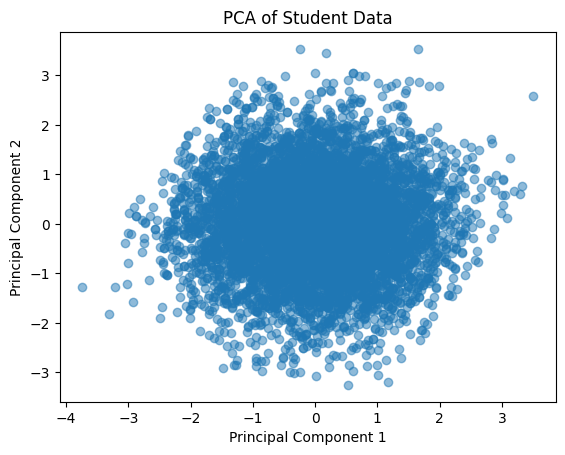

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pilih fitur
features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access']]

# Preprocessing: Encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hours_Studied', 'Attendance', 'Sleep_Hours']),
        ('cat', OneHotEncoder(), ['Motivation_Level', 'Internet_Access'])
    ])

X_processed = preprocessor.fit_transform(features)

# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Visualisasi hasil PCA
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of Student Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


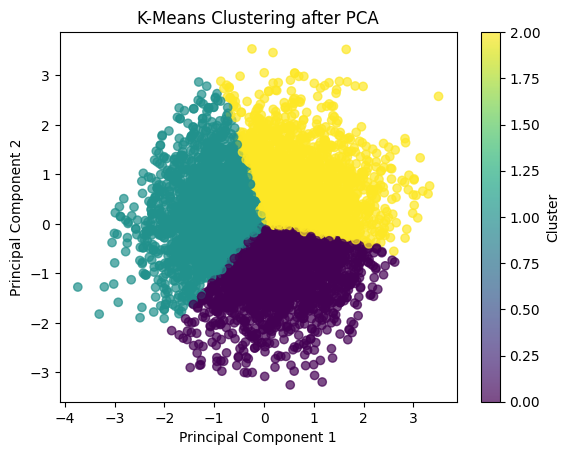

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Terapkan K-Means pada hasil PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualisasi hasil clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
